--- Step 1: Built-in Data Loaded Successfully ---
Number of features: 30
Target classes: ['malignant' 'benign']


--- Step 2: Preprocessing and Splitting Complete ---
Training set size: 455
Testing set size: 114

--- Step 3: Model Training Complete ---

--- Step 4: Model Evaluation ---
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Area Under the ROC Curve (AUC): 0.9974

Confusion matrix saved as 'churn_confusion_matrix.png'
ROC curve saved as 'churn_roc_curve.png'

--- Analysis Complete ---


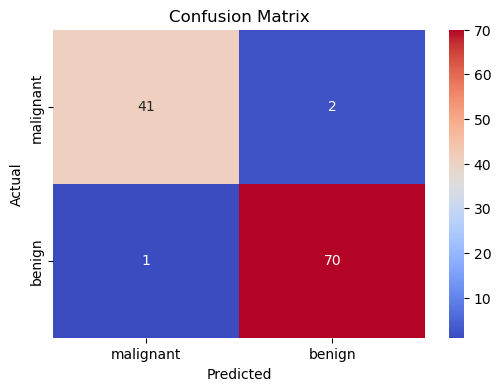

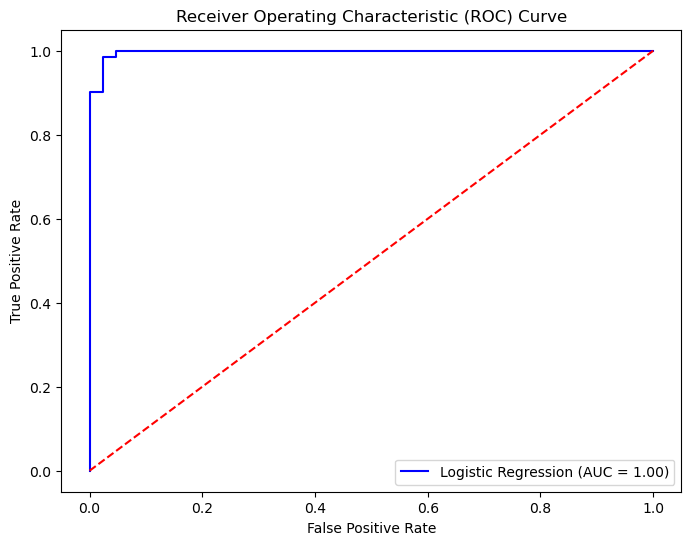

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # --- Step 1: Load the Built-in Data ---
    # We use the Breast Cancer dataset as a proxy for a binary churn problem.
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # For context, let's see the feature names and target names
    # Target: 0 = Malignant (can be seen as "Churned"), 1 = Benign ("Not Churned")
    print("--- Step 1: Built-in Data Loaded Successfully ---")
    print("Number of features:", len(data.feature_names))
    print("Target classes:", data.target_names)
    print("\n")

    # --- Step 2: Preprocess and Split the Data ---
    # Split data before scaling
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print("--- Step 2: Preprocessing and Splitting Complete ---")
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Testing set size: {X_test.shape[0]}\n")

    # --- Step 3: Train the Logistic Regression Model ---
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)
    print("--- Step 3: Model Training Complete ---\n")

    # --- Step 4: Evaluate the Model ---
    # Get predictions
    y_pred = model.predict(X_test_scaled)
    
    # Get prediction probabilities for the positive class (for ROC curve)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate AUC Score
    auc_score = roc_auc_score(y_test, y_pred_proba)

    print("--- Step 4: Model Evaluation ---")
    print(classification_report(y_test, y_pred, target_names=data.target_names))
    print(f"Area Under the ROC Curve (AUC): {auc_score:.4f}")
    
    # Generate and save the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', 
                xticklabels=data.target_names, yticklabels=data.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig('churn_confusion_matrix.png')
    print("\nConfusion matrix saved as 'churn_confusion_matrix.png'")

    # Generate and save the ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--') # Random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.savefig('churn_roc_curve.png')
    print("ROC curve saved as 'churn_roc_curve.png'")
    print("\n--- Analysis Complete ---")

except Exception as e:
    print(f"An error occurred: {e}")